In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import math
import statistics

In [ ]:
img_dir = "sample_images1" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*')
img_files = glob.glob(data_path)

In [ ]:
#read pictures
shape_list = []
pad_list = []
for i in img_files:
    img = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    shape_list.append(img)
#add padd
for i in img_files:
    img = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    img3 = np.pad(img, pad_width=1, mode = 'constant', constant_values = 0)#adding 1 pixel pad
    img5 = np.pad(img, pad_width=2, mode = 'constant', constant_values = 0)#adding 2 pixel pad
    img7 = np.pad(img, pad_width=3, mode = 'constant', constant_values = 0)#adding 3 pixel pad
    
    #add padded pictures to a list
    pad_list.append(img3)
    pad_list.append(img5)
    pad_list.append(img7)

In [ ]:
#creating new image
#listede 1 resmin 5 farkli cesidi var 5 e bol kac resim oldugunu bulmak icin
new_image = []
for i in range(len(pad_list)):
    x_k = pad_list[i].shape[0]#istedigin image
    y_k = pad_list[i].shape[1]
    new_image.append(np.zeros((x_k,y_k),np.uint8))#tupplellardan boyut al

In [2]:
def gaussian(x, mean, variance):
    #calculation
    first = np.exp(-np.power(x - mean, 2.) / (2 * variance))
    second = math.sqrt(2*math.pi*variance)
    return (first/second)    

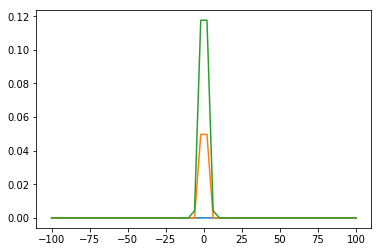

In [7]:
var = [0.2,1.0,5.0]
x = np.linspace(-100,100)
for i in var:
    #creating plot
    plt.plot(x, gaussian(x, 0, i))

plt.show()

In [ ]:
kernel3 =  [[1.0,2.0,1.0],[2.0,4.0,2.0],[1.0,2.0,1.0]]
kernel5 =  [[1,1,2,1,1],[1,2,4,2,1],[2,4,8,4,2],[1,2,4,2,1],[1,1,2,1,1]]
kernel7 =  [[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]]

In [ ]:
#calculate the summation of all cells
sum3 = 0
for i in range(len(kernel3)):
    for j in range(len(kernel3)):
        sum3 += kernel3[i][j]
print(sum3)

sum5 = 0
for i in range(len(kernel5)):
    for j in range(len(kernel5)):
        sum5 += kernel5[i][j]
print(sum5)

sum7 = 0
for i in range(len(kernel7)):
    for j in range(len(kernel7)):
        sum7 += kernel7[i][j]
print(sum7)

In [ ]:
#divide all values in summation
for i in range(len(kernel3)):
    for j in range(len(kernel3)):
        a = kernel3[i][j]/sum3
        kernel3[i][j] = a
        
for i in range(len(kernel5)):
    for j in range(len(kernel5)):
        kernel5[i][j] = kernel5[i][j]/sum5
        
for i in range(len(kernel7)):
    for j in range(len(kernel7)):
        kernel7[i][j] = kernel7[i][j]/sum7

In [ ]:
def apply_kernel(i, j,kernel_size,img_num):
    summ=0
    prod=0
    kernel_index = 0
    for k in range(kernel_size):#row of kernel
        for l in range(kernel_size):#column of kernel
            img = pad_list[img_num*3+kernel_num]#right padded image
            
            if kernel_size==3:
                kernel_index = kernel3[k][l]#finding item in kernel
            elif kernel_size==5:
                kernel_index = kernel5[k][l]#finding item in kernel
            elif kernel_size==7:
                kernel_index = kernel7[k][l]#finding item in kernel
            elif kernel_size==11:
                kernel_index = kernel11[k][l]#finding item in kernel
                
            img_index = img[i+k][j+l]#item of image respect to kernal
            prod = kernel_index * img_index
            summ = summ + prod
    return (summ)

In [ ]:
def filter2d(kernel_size,kernel_num,img_num):
    img_row = shape_list[img_num].shape[0]
    img_col = shape_list[img_num].shape[1]
    mid_kernel = (kernel_size-1)/2
    img = new_image[img_num*3+kernel_num]#right padded empty image
    a=0
    print(img_num," => ",end = "")# to track process
    for i in range(img_row):#row of image
        for j in range(img_col):#column of image
            summ=apply_kernel(i,j,kernel_size,img_num)#sum of items prouct by kernel
            img[i+int(mid_kernel)][j+int(mid_kernel)] = summ#placing sum to middle pixel of new image
        if i%100==0:# to track process
            print(img_row-i,end=" ")
    new_image[img_num*3+kernel_num] = img#replacing image to list
    print("")# to track process

In [ ]:
#blur image 3x3
kernel_num=0
blur3 = []
for img_num in range(len(shape_list)):#traverse all images
    filter2d(3,kernel_num,img_num)#run blur filter QUESTION 1
    
    blur3.append(new_image[img_num*3+kernel_num])
    #display image
    cv2.imshow('3x3', np.hstack((np.uint8(pad_list[img_num*3+kernel_num]),np.uint8(blur3[img_num]))))
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
print('done')

In [ ]:
#blur image 5x5
kernel_num=1
blur5 = []
for img_num in range(len(shape_list)):#traverse all images
    filter2d(5,kernel_num,img_num)#run blur filter QUESTION 1
    
    blur5.append(new_image[img_num*3+kernel_num])
    
    #display image
    cv2.imshow('5x5', np.hstack((np.uint8(pad_list[img_num*3+kernel_num]),np.uint8(new_image[img_num*3+kernel_num]))))
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
print('done')

In [ ]:
#blur image 7x7
kernel_num=2
blur7 = []
for img_num in range(len(shape_list)):#traverse all images
    filter2d(7,kernel_num,img_num)#run blur filter QUESTION 1
    
    blur7.append(new_image[img_num*3+kernel_num])
    
    #display image
    cv2.imshow('7x7', np.hstack((np.uint8(pad_list[img_num*3+kernel_num]),np.uint8(new_image[img_num*3+kernel_num]))))
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
print('done')

In [ ]:
#sharping 3x3 filter img
sharp3 = []
alpha = [0.1,0.5,2]
lent = len(alpha)
for i in range(len(blur3)):
    for a in range(lent):
        sharp3.append(pad_list[i*3] - alpha[a]*(pad_list[i*3] - blur3[i]))

    #display shifted images
    cv2.imshow('0.1 0.5 1', np.hstack((np.uint8(sharp3[i*lent]),np.uint8(sharp3[i*lent+1]),np.uint8(sharp3[i*lent+2]))))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
sharp5 = []
alpha = [0.1,0.5,2]
lent = len(alpha)
for i in range(len(blur5)):
    for a in range(lent):
        sharp5.append(pad_list[i*3+1] - alpha[a]*(pad_list[i*3+1] - blur5[i]))

    #display shifted images
    cv2.imshow('0.1 0.5 1', np.hstack((np.uint8(sharp5[i*lent]),np.uint8(sharp5[i*lent+1]),np.uint8(sharp5[i*lent+2]))))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
sharp7 = []
alpha = [0.1,0.5,2]
lent = len(alpha)
for i in range(len(blur7)):
    for a in range(lent):
        sharp7.append(pad_list[i*3+2] - alpha[a]*(pad_list[i*3+2] - blur7[i]))

    #display shifted images
    cv2.imshow('0.1 0.5 1', np.hstack((np.uint8(sharp7[i*lent]),np.uint8(sharp7[i*lent+1]),np.uint8(sharp7[i*lent+2]))))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
img_dir = "sample_images2" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*')
img_files2 = glob.glob(data_path)

In [ ]:
#read pictures
shape_list2 = []
pad_list2 = []
for i in img_files2:
    img2 = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    shape_list2.append(img2)
#add padd
for i in img_files2:
    img2 = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    img33 = np.pad(img2, pad_width=1, mode = 'constant', constant_values = 0)#adding 1 pixel pad
    img55 = np.pad(img2, pad_width=2, mode = 'constant', constant_values = 0)#adding 2 pixel pad
    img77 = np.pad(img2, pad_width=3, mode = 'constant', constant_values = 0)#adding 3 pixel pad
    
    #add padded pictures to a list
    pad_list2.append(img33)
    pad_list2.append(img55)
    pad_list2.append(img77)

In [ ]:
#creating new image
#listede 1 resmin 5 farkli cesidi var 5 e bol kac resim oldugunu bulmak icin
new_image2 = []
for i in range(len(pad_list2)):
    x_k2 = pad_list2[i].shape[0]#istedigin image
    y_k2 = pad_list2[i].shape[1]
    new_image2.append(np.zeros((x_k2,y_k2),np.uint8))#tupplellardan boyut al

In [ ]:
#list for median
kernel_median3 = [0]*9
kernel_median5 = [0]*25
kernel_median7 = [0]*49

In [ ]:
def apply_kernel2(i, j,kernel_size,img_num):
    summ=0
    prod=0
    kernel_index = 0
    s=0
    for k in range(kernel_size):#row of kernel
        for l in range(kernel_size):#column of kernel
            img2 = pad_list2[img_num*3+kernel_num]#right padded 
            #salt and pepper filter
            if kernel_size==3:
                kernel_median3[s] = img2[i+k][j+l]#adding item in kernel
            elif kernel_size==5:
                kernel_median5[s] = img2[i+k][j+l]#adding item in kernel
            elif kernel_size==7:
                kernel_median7[s] = img2[i+k][j+l]#adding item in kernel
            s+=1
            img_index = img2[i+k][j+l]#item of image respect to kernal
            prod = kernel_index * img_index
            summ = summ + prod
    if kernel_size==3:
        summ = statistics.median(kernel_median3)
    elif kernel_size==5:
        summ = statistics.median(kernel_median5)
    elif kernel_size==7:      
        summ = statistics.median(kernel_median7)
    return (summ)

In [ ]:
def filter4d(kernel_size,kernel_num,img_num):
    img_row = shape_list2[img_num].shape[0]
    img_col = shape_list2[img_num].shape[1]
    mid_kernel = (kernel_size-1)/2
    img2 = new_image2[img_num*3+kernel_num]#right padded empty image
    a=0
    print(img_num," => ",end = "")# to track process
    for i in range(img_row):#row of image
        for j in range(img_col):#column of image
            summ=apply_kernel2(i,j,kernel_size,img_num)#sum of items prouct by kernel
            img2[i+int(mid_kernel)][j+int(mid_kernel)] = summ#placing sum to middle pixel of new image
        if i%100==0:# to track process
            print(img_row-i,end=" ")
    new_image2[img_num*3+kernel_num] = img2#replacing image to list
    print("")# to track process

In [ ]:
#salt and pepper
kernel_num = 0
for img_num in range(len(shape_list2)):
    filter4d(3,kernel_num,img_num)#run salt and pepper filter
    
    #display cleared image
    cv2.imshow('salt and pepper', np.hstack((np.uint8(pad_list2[img_num*3+kernel_num]),(np.uint8(new_image2[img_num*3+kernel_num])))))
    cv2.waitKey(0)
    cv2.destroyAllWindows() 

In [ ]:
#salt and pepper
kernel_num = 1
for img_num in range(len(shape_list2)):
    filter4d(5,kernel_num,img_num)#run salt and pepper filter
    
    #display cleared image
    cv2.imshow('salt and pepper', np.hstack((np.uint8(pad_list2[img_num*3+kernel_num]),(np.uint8(new_image2[img_num*3+kernel_num])))))
    cv2.waitKey(0)
    cv2.destroyAllWindows() 

In [ ]:
#salt and pepper
kernel_num = 2
for img_num in range(len(shape_list2)):
    filter4d(7,kernel_num,img_num)#run salt and pepper filter
    
    #display cleared image
    cv2.imshow('salt and pepper', np.hstack((np.uint8(pad_list2[img_num*3+kernel_num]),(np.uint8(new_image2[img_num*3+kernel_num])))))
    cv2.waitKey(0)
    cv2.destroyAllWindows() 